# Shallow Neural Network in TensorFlow

![shallow_network_architecture.png](attachment:shallow_network_architecture.png)

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np

##### MNIST Dataset - handwritten digits 28x28
##### to_categorical - Converts a class vector (integers) to binary class matrix.

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##### Exploration of the data.

(28, 28)


<Axes: >

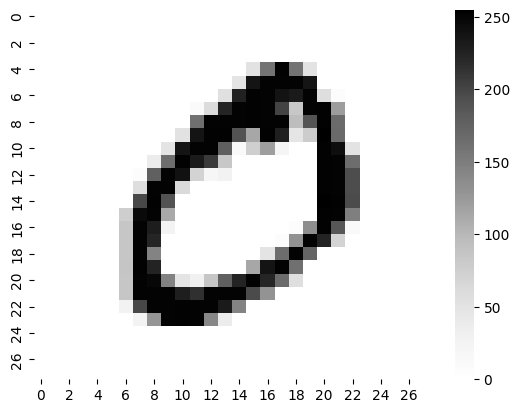

In [ ]:
import seaborn

print(X_train[1].shape)
seaborn.heatmap(X_train[1], cmap='Greys')

(28, 28)


<Axes: >

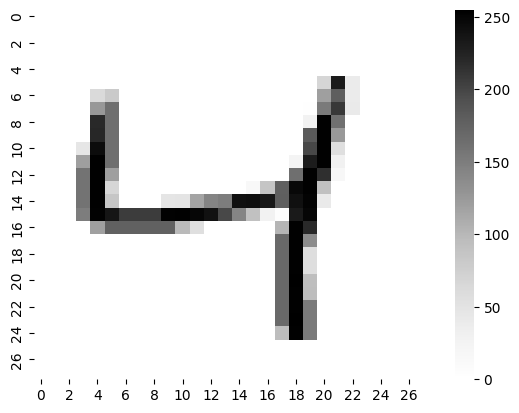

In [ ]:
print(X_train[2].shape)
seaborn.heatmap(X_train[2], cmap='Greys')

##### Corresponding label for picture

In [ ]:
print(y_train[1])
print(type(y_train[1]))

0
<class 'numpy.uint8'>


In [ ]:
print(y_train[:15])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


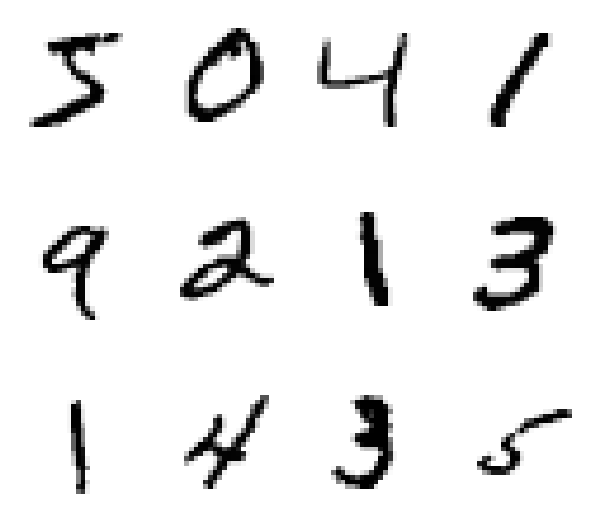

In [ ]:
plt.figure(figsize=(6,6))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(X_valid.shape)
print(X_train.shape)

(10000, 28, 28)
(60000, 28, 28)


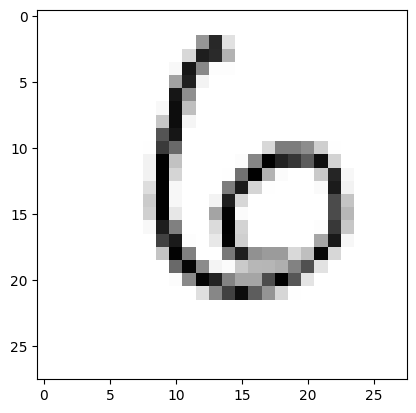

In [ ]:
_ = plt.imshow(X_valid[100], cmap='Greys')

First stage of preprocessing -
1. Reshape 2D matrix to 1D vector
2. Change int to float
3. Standarization - full black pixel is 1,

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')
X_valid = X_valid/255.0
X_train = X_train/255.0

In [ ]:
np.max(X_valid)

1.0

We encode numbers to binary values for softmax

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes) # conveing labes for computer to understand
y_valid = to_categorical(y_valid, n_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Let's build the model

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='sigmoid', input_shape=(784,)))    # units - neurons number, activating function - threshld when neurn activates sigmoid / relu  etc, input_shap - shape of signal coming TO the layer
model.add(Dense(units=10, activation='softmax'))                        # output layer softmax ( if anything else softmax will be assumed) - gives us propabilities of given classes - meant for classification

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Choosing hyperparameters for training

### <b> Regression </b> - mean square error is ok
### <b> categorical_crossentropy</b> shape of distribution
### <b> binary_crossentropy</b> - only 2 classes
### <b> sparse_categorical_crossentropy</b> function
### <b> optiomizer</b> - drives change of the params - it changes the weights of model

In [ ]:
# model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])     # Loss function dW ~ L^2(L)
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 1.7510 - accuracy: 0.6639 - val_loss: 1.5360 - val_accuracy: 0.7343
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 1.3848 - accuracy: 0.7524 - val_loss: 1.2185 - val_accuracy: 0.7842
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 1.1213 - accuracy: 0.7913 - val_loss: 1.0009 - val_accuracy: 0.8151
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.9430 - accuracy: 0.8157 - val_loss: 0.8547 - val_accuracy: 0.8320
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.8214 - accuracy: 0.8305 - val_loss: 0.7536 - val_accuracy: 0.8453
Epoch 6/30
469/469 [==============================] - 3s 5ms/step - loss: 0.7352 - accuracy: 0.8417 - val_loss: 0.6796 - val_accuracy: 0.8548
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.6712 - accuracy: 0.8498 - val_loss: 0.6244 - val_accuracy: 0.8639
Epoch 

In [ ]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.9097


[0.3301326036453247, 0.9096999764442444]

In [ ]:
model.save('./data/models/nn_model')

## Mashine learning


*   $X_l^j$ - input data
*   Forward propagated
*   $ M(W_k^n) = ̅\overline{J^j} $
*   $ \mathcal{L}(J_i, \overline{J_j}) $ - Cost function
*   based on loss function we have optimizes
*   $ \Delta W = \frac{ \partial \mathcal{L}}{ \partial w_k^n } $


